<a href="https://colab.research.google.com/github/xrizer/Portfolio-Data-Analysis/blob/main/Aqshol_Afifi_Dicoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data akun dicoding** 
**username : Aqshol Afifi**

**email_account : aqsholafifi@gmail.com**

In [ ]:
# import tensorflow
import tensorflow as tf
print(tf.__version__)

2.5.0


In [ ]:
# unduh dataset dari situs dicoding 
!wget https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-07-04 05:21:54--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  12.2MB/s    in 30s     

2021-07-04 05:22:24 (10.2 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os
import numpy as np
import shutil

rootdir= '/content/rockpaperscissors/rps-cv-images' #path of the original folder
classes = ['paper','rock','scissors']

for i in classes:
  os.makedirs(rootdir +'/train/' + i)
  os.makedirs(rootdir +'/val/' + i)

  source = rootdir + '/' + i
  allFileNames = os.listdir(source)
  np.random.shuffle(allFileNames)
  val_ratio = 0.4
  train_FileNames, val_FileNames = np.split(np.array(allFileNames),
                                                        [int(len(allFileNames)* (1 - val_ratio))])
  train_FileNames = [source+'/'+ name for name in train_FileNames.tolist()]
  val_FileNames = [source+'/' + name for name in val_FileNames.tolist()]

  for name in train_FileNames:
    shutil.copy(name, rootdir +'/train/' + i)

  for name in val_FileNames:
    shutil.copy(name, rootdir +'/val/' + i)

In [ ]:
base_dir = '/content/rockpaperscissors/rps-cv-images'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [ ]:
#membuat image data generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
val_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='sparse')
 
validation_generator = val_datagen.flow_from_directory(
        val_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='sparse')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=25,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/25
25/25 - 9s - loss: 1.1789 - accuracy: 0.4100 - val_loss: 1.0904 - val_accuracy: 0.5000
Epoch 2/25
25/25 - 8s - loss: 1.1010 - accuracy: 0.3100 - val_loss: 1.0975 - val_accuracy: 0.3500
Epoch 3/25
25/25 - 8s - loss: 1.0996 - accuracy: 0.3300 - val_loss: 1.0867 - val_accuracy: 0.6000
Epoch 4/25
25/25 - 8s - loss: 1.0883 - accuracy: 0.4400 - val_loss: 1.1251 - val_accuracy: 0.3000
Epoch 5/25
25/25 - 8s - loss: 1.0773 - accuracy: 0.4400 - val_loss: 0.9620 - val_accuracy: 0.5500
Epoch 6/25
25/25 - 8s - loss: 0.8949 - accuracy: 0.5900 - val_loss: 0.7171 - val_accuracy: 0.7000
Epoch 7/25
25/25 - 8s - loss: 0.5457 - accuracy: 0.8000 - val_loss: 0.6462 - val_accuracy: 0.7000
Epoch 8/25
25/25 - 8s - loss: 0.5914 - accuracy: 0.7600 - val_loss: 0.3676 - val_accuracy: 0.9000
Epoch 9/25
25/25 - 8s - loss: 0.4181 - accuracy: 0.8400 - val_loss: 0.4303 - val_accuracy: 0.8500
Epoch 10/25
25/25 - 8s - loss: 0.4779 - accuracy: 0.8200 - val_loss: 0.2732 - val_accuracy: 0.9500
Epoch 11/25
25/25 -

Saving 2.jpg to 2 (3).jpg
paper


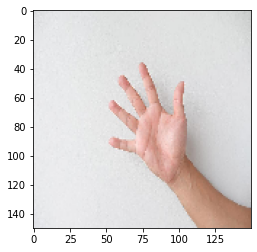

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  if classes.sum()==1.0:
    print('paper')
  elif classes.sum()>=2:
    print('rock')
  else:
    print('scissors')